<a href="https://colab.research.google.com/github/Seung-heon-Baek/Precily/blob/main/Precily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SmritiChawla/Precily.git

Cloning into 'Precily'...
remote: Enumerating objects: 1243, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 1243 (delta 32), reused 89 (delta 30), pack-reused 1150 (from 1)
Receiving objects: 100% (1243/1243), 1.68 GiB | 24.35 MiB/s, done.
Resolving deltas: 100% (540/540), done.
Updating files: 100% (259/259), done.


In [ ]:
!pwd

/content


In [ ]:
!ls /content/Precily

ls: cannot access '/content/Precily': No such file or directory


In [ ]:
!pip install keras
!pip install caret
!pip install ggpubr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement ggpubr (from versions: none)
ERROR: No matching distribution found for ggpubr


In [ ]:
!sudo apt-get install r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [7]:
# ggpubr 설치
!R -e "install.packages('ggpubr', repos='http://cran.r-project.org')"


Streaming output truncated to the last 5000 lines.
../inst/include/Eigen/src/Eigenvalues/Tridiagonalization.h:434:55:   required from ‘void Eigen::internal::tridiagonalization_inplace(MatrixType&, DiagonalType&, SubDiagonalType&, CoeffVectorType&, bool) [with MatrixType = Eigen::Matrix<double, -1, -1>; DiagonalType = Eigen::Matrix<double, -1, 1>; SubDiagonalType = Eigen::Matrix<double, -1, 1>; CoeffVectorType = Eigen::Matrix<double, -1, 1>]’
../inst/include/Eigen/src/Eigenvalues/SelfAdjointEigenSolver.h:458:39:   required from ‘Eigen::SelfAdjointEigenSolver<MatrixType>& Eigen::SelfAdjointEigenSolver<_MatrixType>::compute(const Eigen::EigenBase<OtherDerived>&, int) [with InputType = Eigen::SelfAdjointView<Eigen::Matrix<double, -1, -1>, 1>; _MatrixType = Eigen::Matrix<double, -1, -1>]’
../inst/include/Eigen/src/Eigenvalues/SelfAdjointEigenSolver.h:181:14:   required from ‘Eigen::SelfAdjointEigenSolver<_MatrixType>::SelfAdjointEigenSolver(const Eigen::EigenBase<OtherDerived>&, int) [with 

In [ ]:
from tensorflow.keras.models import load_model


In [10]:
!pip install -q -U keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.6 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

**Precily/Fig1/Fig1c/Fig1c_Precily_pathways**
**/Fig1c.R**

-----------------코드 복사------------------------------

Vale GI50 데이터 중에서 Precily에서 gene expresison 데이터를 공개한 세포주와의 교집합 (126개 세포주)에 대해서 테스트

In [ ]:
test = pd.read_csv("/content/Precily/Fig1/Fig1c/Fig1c_Precily_pathways/Test_Set.csv", sep=",")
# '0'열 : 세포주명, '1'열 : 약물명, '2~1330' : 세포주 pathwat feature (1329), '1331~1430' : 약물 feature(100), '1431'열 : lnIC50
print(test.head())

       0               1         2        3         4         5         6  \
0  22RV1  5-Fluorouracil -0.033926  0.61844 -0.123854  0.421681  0.025471   
1  22RV1          ABT737 -0.033926  0.61844 -0.123854  0.421681  0.025471   
2  22RV1        Acetalax -0.033926  0.61844 -0.123854  0.421681  0.025471   
3  22RV1        Afatinib -0.033926  0.61844 -0.123854  0.421681  0.025471   
4  22RV1     Afuresertib -0.033926  0.61844 -0.123854  0.421681  0.025471   

         7         8         9  ...      1422      1423      1424      1425  \
0 -0.15411  0.495994  0.278725  ... -0.011703 -0.414060  0.061474  0.549070   
1 -0.15411  0.495994  0.278725  ... -0.113681  0.204337 -0.150768  0.114594   
2 -0.15411  0.495994  0.278725  ...  0.079674  0.481107 -0.289358  0.153831   
3 -0.15411  0.495994  0.278725  ... -0.019880  0.096177  0.073550  0.238451   
4 -0.15411  0.495994  0.278725  ... -0.151985  0.201704 -0.057129  0.264910   

       1426      1427      1428      1429      1430      1431 

In [12]:
test = pd.read_csv("/content/Precily/TestSet_matching.csv", sep=",")
# '0'열 : 세포주명, '1'열 : 약물명, '2~1330' : 세포주 pathwat feature (1329), '1331~1430' : 약물 feature(100), '1431'열 : lnIC50
print(test.head())

       0             1         2         3         4         5         6  \
0  22RV1  valemetostat -0.033926  0.618440 -0.123854  0.421681  0.025471   
1   A204  valemetostat  0.181743  0.304799  0.284330  0.243734 -0.051022   
2  A2780  valemetostat  0.215387  0.374965  0.239095 -0.370682  0.151144   
3   A673  valemetostat  0.127444  0.182009 -0.075483 -0.458368 -0.201968   
4   A704  valemetostat -0.087525 -0.555774 -0.415986  0.218345 -0.075579   

          7         8         9  ...      1422      1423     1424     1425  \
0 -0.154110  0.495994  0.278725  ...  0.022795  0.039361  0.00986  0.07633   
1  0.385654  0.199621  0.353512  ...  0.022795  0.039361  0.00986  0.07633   
2 -0.231283  0.090615  0.010265  ...  0.022795  0.039361  0.00986  0.07633   
3 -0.098769 -0.247457  0.151550  ...  0.022795  0.039361  0.00986  0.07633   
4 -0.498796  0.240033 -0.293905  ...  0.022795  0.039361  0.00986  0.07633   

      1426     1427      1428      1429      1430      1431  
0  0.09438  

In [26]:
test = pd.read_csv("/content/Precily/TestSet_matching_wo1000.csv", sep=",")
# '0'열 : 세포주명, '1'열 : 약물명, '2~1330' : 세포주 pathwat feature (1329), '1331~1430' : 약물 feature(100), '1431'열 : lnIC50
print(test.head())

       0             1         2         3         4         5         6  \
0  22RV1  valemetostat -0.033926  0.618440 -0.123854  0.421681  0.025471   
1   A204  valemetostat  0.181743  0.304799  0.284330  0.243734 -0.051022   
2  A2780  valemetostat  0.215387  0.374965  0.239095 -0.370682  0.151144   
3  AU565  valemetostat  0.352567  0.704006  0.277408  0.358481  0.351855   
4  BT483  valemetostat -0.176144 -0.194050 -0.145169  0.239867  0.217304   

          7         8         9  ...      1422      1423     1424     1425  \
0 -0.154110  0.495994  0.278725  ...  0.022795  0.039361  0.00986  0.07633   
1  0.385654  0.199621  0.353512  ...  0.022795  0.039361  0.00986  0.07633   
2 -0.231283  0.090615  0.010265  ...  0.022795  0.039361  0.00986  0.07633   
3  0.423790  0.471299  0.345996  ...  0.022795  0.039361  0.00986  0.07633   
4 -0.204955  0.302612 -0.036894  ...  0.022795  0.039361  0.00986  0.07633   

      1426     1427      1428      1429      1430      1431  
0  0.09438  

In [27]:
drugs = test['1'].unique()

print(drugs)

['valemetostat']


In [28]:
len(drugs)

1

In [29]:
correlation = {}


In [30]:
model1 = load_model("/content/Precily/Fig1/Fig1c/Fig1c_Precily_pathways/Model1.hdf5")
model2 = load_model("/content/Precily/Fig1/Fig1c/Fig1c_Precily_pathways/Model2.hdf5")
model3 = load_model("/content/Precily/Fig1/Fig1c/Fig1c_Precily_pathways/Model3.hdf5")
model4 = load_model("/content/Precily/Fig1/Fig1c/Fig1c_Precily_pathways/Model4.hdf5")
model5 = load_model("/content/Precily/Fig1/Fig1c/Fig1c_Precily_pathways/Model5.hdf5")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [31]:
# 각 약물에 대해 루프 실행
for i in drugs:
    # 특정 약물에 해당하는 행 필터링
    test1 = test[test['1'] == i]
    testd = test1.iloc[:, 2:1431].to_numpy()  # 3~1431번째 열 추출 (특징 데이터)
    IC50 = test1.iloc[:, 1431].to_numpy()  # 1432번째 열 (IC50 값)

    # 예측 수행
    prediction1 = model1.predict(testd).flatten()
    prediction2 = model2.predict(testd).flatten()
    prediction3 = model3.predict(testd).flatten()
    prediction4 = model4.predict(testd).flatten()
    prediction5 = model5.predict(testd).flatten()

    predictions = np.mean([prediction1, prediction2, prediction3, prediction4, prediction5], axis=0)

    correlation[i] = np.corrcoef(predictions, IC50)[0, 1]

print(correlation)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
{'valemetostat': 0.36685102680432596}


In [32]:
print(correlation)

{'valemetostat': 0.36685102680432596}


In [33]:
print(predictions)
print(IC50)

[-2.8118968  -3.3776002  -2.4127977  -6.273568   -0.8228428  -3.3462815
 -3.0738635  -3.6459775  -1.3814471  -2.1432233  -2.999787   -3.7035263
 -0.57640207 -1.831377   -2.5329304  -3.1593864  -4.950141   -2.0191445
 -1.2528884  -6.1589766  -2.528286   -0.879769   -3.6461854  -5.9913
 -3.8090425  -2.695745    0.43023378 -3.2906234  -5.3794494  -5.737979
 -0.31227118 -3.3703628  -3.832379   -2.8858666  -3.168139   -2.2256684
 -0.3695973  -2.670817   -2.4432435  -1.5079899  -1.2549803  -3.215201
 -3.4966176  -2.8952065  -3.4281006  -3.0789776  -3.9528623  -3.4099975
 -3.651544   -4.525527   -0.2291842 ]
[3.62966009 3.37416871 3.87120101 3.8649314  5.6167711  1.8809906
 1.41342303 1.70474809 4.43675153 3.87949981 2.77258872 3.09104245
 6.10031895 3.04452244 5.95583737 3.26575941 3.09104245 3.55534806
 4.24849524 1.90210753 5.32787617 2.90142159 4.92725369 1.71018782
 5.01063529 4.55912625 3.78191432 4.69134788 3.20680324 4.82028157
 5.18738581 1.48160454 4.65396035 1.80828877 4.82028157 6

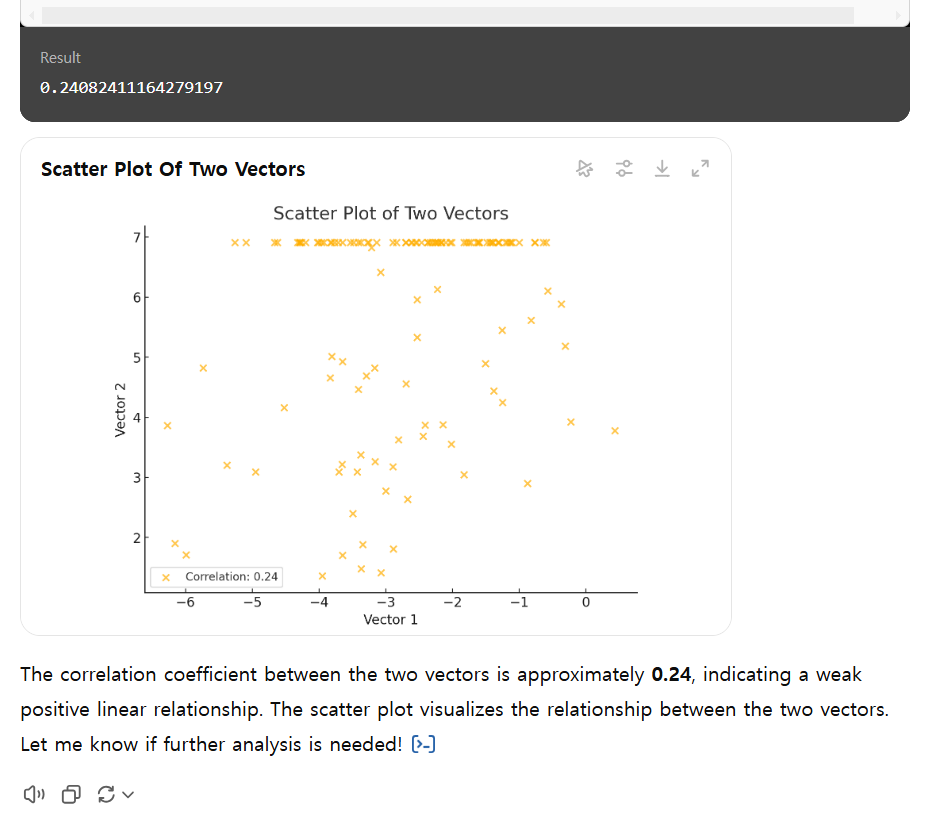

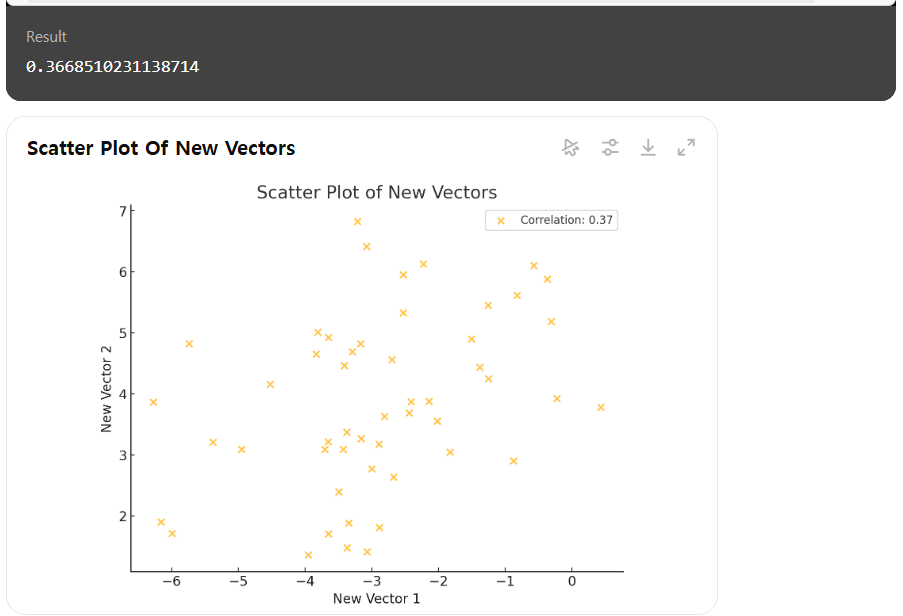

In [34]:
cor = pd.DataFrame.from_dict(correlation, orient='index', columns=['Correlation'])

In [35]:
print(cor)

              Correlation
valemetostat     0.366851


In [21]:
mean_correlation = cor['Correlation'].mean()
print(mean_correlation)

0.24082411156985464


SMILESVec feature 생성 - 깃허브에 예시파일까지 자세히 설명됨
파일 위치만 주의

In [ ]:
!git clone https://github.com/hkmztrk/SMILESVecProteinRepresentation.git

Cloning into 'SMILESVecProteinRepresentation'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 301 (delta 5), reused 16 (delta 5), pack-reused 285 (from 1)
Receiving objects: 100% (301/301), 15.93 MiB | 13.47 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [ ]:
!python getsmilesvec.py word-level.txt

Constructing SMILES vectors..
Done.


In [ ]:
import pickle

# 파일 경로 지정
file_path = "/content/smiles.vec"

# pickle 파일 로드
with open(file_path, "rb") as f:
    smiles_data = pickle.load(f)

print("smiles.vec 파일 로드 성공:", smiles_data)

smiles.vec 파일 로드 성공: [[0.04122915838436201, 0.09176874451520967, 0.02295703693043168, -0.040028159302182315, -0.09778240204947751, 0.024170902625816625, 0.013085073473431715, 0.047316024034488494, -0.027265512906923528, 0.14039282682465343, -0.02562706091827372, -0.11572831614715297, -0.1555692079227145, 0.00670048817083603, 0.10398139091344868, 0.03693145129080044, 0.056566927036861094, -0.002702670929976171, -0.0006304511277959114, -0.05060470694812333, -0.029847561359042075, 0.006632427798538673, 0.02263565820346518, 0.009482598250232092, -0.016822671086141248, 0.19484625402383687, 0.09625787774055469, 0.054897719846538656, 0.02838018291243693, 0.07289359652687137, 0.08087703612882917, 0.04150431775828687, -0.14365209602728124, 0.02581467104382904, 0.03964827972941282, 0.004378549135630814, -0.002052317623321603, -0.035887902011958565, -0.06516334099876808, -0.07448630534657617, 0.017391072523712022, 0.025114048987899613, 0.014188658559649455, 0.03056528068306606, 0.0600198166354036

In [ ]:
len(smiles_data)

2